# Jonathan Halverson
# Sunday, April 3, 2016
# Iris data set

In this notebook we consider the famous Iris data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [137]:
from sklearn.datasets import load_iris
iris = load_iris()
print type(iris)
print iris.keys()

<class 'sklearn.datasets.base.Bunch'>
['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [ ]:
df = pd.DataFrame(iris.data, columns=['s_len', 's_wdt', 'p_len', 'p_wdt'])
df['species'] = iris.target
df.head()

To check for collinearity we compute the correlation matrix:

In [37]:
df.ix[:,0:4].corr()

,s_len,s_wdt,p_len,p_wdt
s_len,1.000000,-0.109369,0.871754,0.817954
s_wdt,-0.109369,1.000000,-0.420516,-0.356544
p_len,0.871754,-0.420516,1.000000,0.962757
p_wdt,0.817954,-0.356544,0.962757,1.000000


We see that three pairs of predictors have an absolute value of the correlation of greater than 0.8. We must keep this in mind for certain ML models. Next we look at descriptive statistics for each of the three species in the form of box plots:

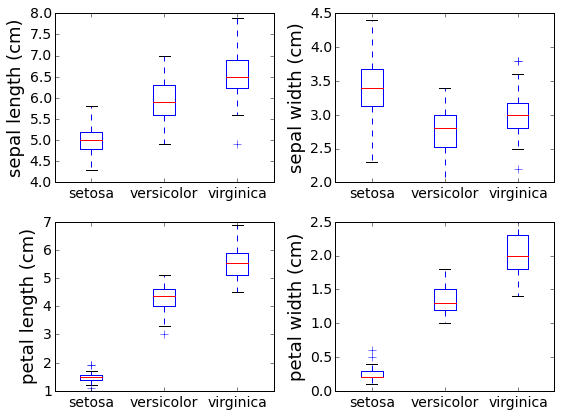

In [112]:
f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
for i in range(4):
    exec('ax' + str(i) + '.boxplot([df[df.species == 0].ix[:,'+ str(i) + '], df[df.species == 1].ix[:,' + str(i) + '], df[df.species == 2].ix[:,' + str(i) + ']], labels=iris.target_names)')  
    exec('ax' + str(i) + '.set_ylabel(iris.feature_names[' + str(i) + '])')
plt.tight_layout()

We see that setosa can be indentified by having a small petal length and width. However, the other two species cannot be distinguished easily. Let's try forming the product of the four features since virginica is consistently higher than versicolor.

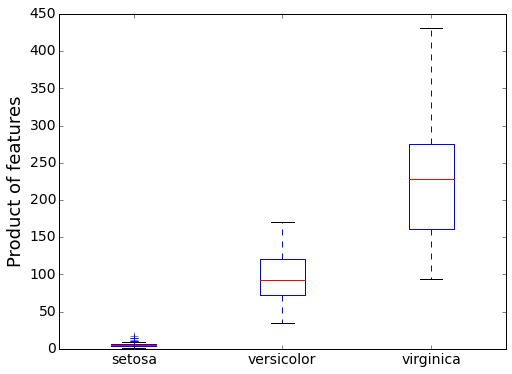

In [136]:
df['prod'] = df.s_len * df.s_wdt * df.p_len * df.p_wdt
plt.boxplot([df[df.species == 0]['prod'], df[df.species == 1]['prod'], df[df.species == 2]['prod']], labels=iris.target_names)
plt.ylabel('Product of features')

This simple new feature is not enough to distinguish the two.

Let's ignore the targets and try to plot the data in a way that reveals three distinct clusters. Domain knowledge on plants would be useful here. Let's try area and then aspect ratio.

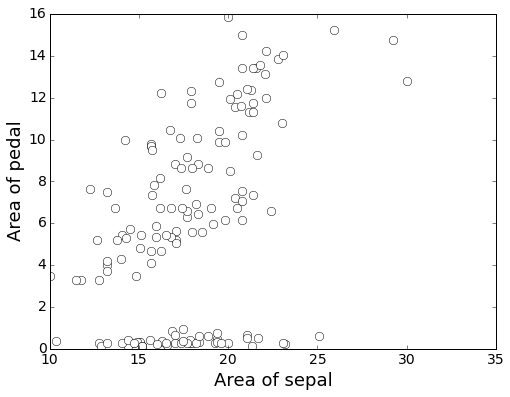

In [30]:
plt.plot(df.s_len * df.s_wdt, df.p_len * df.p_wdt, 'wo')
plt.xlabel('Area of sepal')
plt.ylabel('Area of pedal')

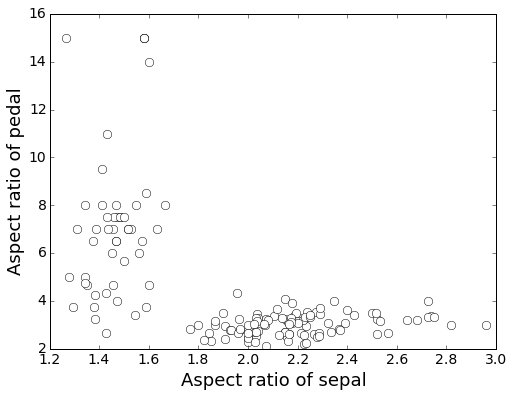

In [32]:
plt.plot(df.s_len / df.s_wdt, df.p_len / df.p_wdt, 'wo')
plt.xlabel('Aspect ratio of sepal')
plt.ylabel('Aspect ratio of pedal')

These two simple plots do not separate into three distinct clusters. It may be that there is no transformation that will do this. Or mabye more domain knowledge is needed.

Let's use a classification model:

In [ ]:
X = iris.data
y = iris.target